In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [2]:
# Load cleaned data
file_path = r"C:\Users\Vanitha\OneDrive\Documents\GUVI\capstone_project\app_user_behavior_segmentation\data\cleaned\cleaned_data.csv"
df_model = pd.read_csv(file_path)

df_model.shape
df_model.head() 

,age,sessions_per_week,avg_session_duration_min,daily_active_minutes,feature_clicks_per_session,notifications_opened_per_week,in_app_search_count,pages_viewed_per_session,crash_events_last_30_days,support_tickets_raised,...,app_version_1.1,app_version_1.2,app_version_2.0,app_version_2.1,subscription_type_Free,subscription_type_Premium,marketing_source_Facebook Ads,marketing_source_Google Ads,marketing_source_Organic,marketing_source_Referral
0,56,5,3.41,52.71,13,5,8,8,1,0,...,False,False,False,True,False,False,False,False,False,True
1,46,8,24.44,42.03,7,7,3,7,0,0,...,False,False,False,False,True,False,False,False,False,False
2,32,12,5.34,76.69,7,5,2,21,1,0,...,False,True,False,False,True,False,False,True,False,False
3,25,5,3.98,65.38,16,8,4,13,0,0,...,False,False,True,False,False,False,False,False,True,False
4,38,10,12.85,57.06,13,7,3,15,0,0,...,False,False,False,False,False,False,False,False,False,False


In [3]:
# Load the scales data
file_path1 = r"C:\Users\Vanitha\OneDrive\Documents\GUVI\capstone_project\app_user_behavior_segmentation\data\cleaned\scaled_for_clustering.csv"
scaled_df = pd.read_csv(file_path1)

scaled_df.head() 

,age,sessions_per_week,avg_session_duration_min,daily_active_minutes,feature_clicks_per_session,notifications_opened_per_week,in_app_search_count,pages_viewed_per_session,crash_events_last_30_days,support_tickets_raised,...,app_version_1.1,app_version_1.2,app_version_2.0,app_version_2.1,subscription_type_Free,subscription_type_Premium,marketing_source_Facebook Ads,marketing_source_Google Ads,marketing_source_Organic,marketing_source_Referral
0,1.445821,-1.060179,-1.088633,0.386849,0.283336,0.001512,2.002730,-0.862410,0.950305,-0.442514,...,-0.499344,-0.501687,-0.497593,2.014363,-1.229247,-0.417346,-0.418864,-0.576365,-0.735058,2.373221
1,0.619022,0.000113,1.261914,-0.160705,-1.440677,0.896304,-0.500094,-1.020050,-0.627017,-0.442514,...,-0.499344,-0.501687,-0.497593,-0.496435,0.813506,-0.417346,-0.418864,-0.576365,-0.735058,-0.421368
2,-0.538498,1.413835,-0.872915,1.616282,-1.440677,0.001512,-1.000659,1.186909,0.950305,-0.442514,...,-0.499344,1.993275,-0.497593,-0.496435,0.813506,-0.417346,-0.418864,1.735012,-0.735058,-0.421368
3,-1.117258,-1.060179,-1.024924,1.036429,1.145342,1.343700,0.000471,-0.074211,-0.627017,-0.442514,...,-0.499344,-0.501687,2.009676,-0.496435,-1.229247,-0.417346,-0.418864,-0.576365,1.360437,-0.421368
4,-0.042418,0.706974,-0.033514,0.609870,0.283336,0.896304,-0.500094,0.241069,-0.627017,-0.442514,...,-0.499344,-0.501687,-0.497593,-0.496435,-1.229247,-0.417346,-0.418864,-0.576365,-0.735058,-0.421368


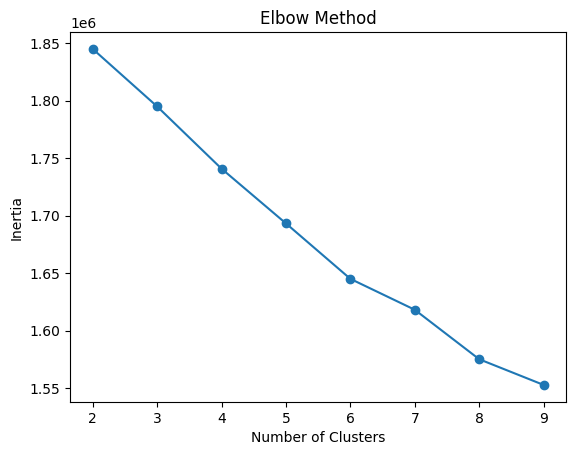

In [4]:
# K-Means Finding Optimal Clusters
# Elbow method
inertia = []

for k in range(2, 10):
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

plt.plot(range(2, 10), inertia, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()   

In [5]:
# K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
df_model['kmeans_cluster'] = kmeans.fit_predict(scaled_df)

df_model['kmeans_cluster'].value_counts() 

kmeans_cluster
1    28848
3    10415
2     6884
0     3853
Name: count, dtype: int64

In [6]:
# Silhouette Score
kmeans_silhouette = silhouette_score(scaled_df, df_model['kmeans_cluster'])
print("K-Means Silhouette Score:", kmeans_silhouette) 

K-Means Silhouette Score: 0.05771192547974988


In [ ]:
# Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')
df_model['hierarchical_cluster'] = hierarchical.fit_predict(scaled_df)

df_model['hierarchical_cluster'].value_counts() 


hierarchical_cluster
1    33820
0     9370
3     4741
2     2069
Name: count, dtype: int64

In [9]:
# Silhouette Score
hierarchical_silhouette = silhouette_score(scaled_df, df_model['hierarchical_cluster'])
print("Hierarchical Silhouette Score:", hierarchical_silhouette) 

Hierarchical Silhouette Score: 0.06506487489923742


In [10]:
# BIRCH Clustering
from sklearn.cluster import Birch

birch = Birch(n_clusters=4)
df_model['birch_cluster'] = birch.fit_predict(scaled_df)

print(df_model['birch_cluster'].value_counts()) 

birch_cluster
1    33820
0     9370
3     4741
2     2069
Name: count, dtype: int64


In [11]:
# Silhouette Score
sil_birch = silhouette_score(scaled_df, df_model['birch_cluster'])
print("BIRCH Silhouette Score:", sil_birch) 

BIRCH Silhouette Score: 0.06506487489923742


# Insights for Comparing 3 Clustering Models 
## " The Conclusion is..."
1. K-Means was selected as the primary clustering algorithm due to its scalability and efficiency on large datasets. BIRCH was used as an alternative scalable method for comparison, while hierarchical clustering was applied on a representative sample to analyze cluster structure and validate the chosen number of clusters.
2. Hierarchical & BIRCH slightly outperformed K-Means numerically, but the difference is negligible.
3. K-Means remains the best overall choice due to interpretability, stability, and practical usability — not because of Silhouette Score alone.
4. K-Means is Best because,
 --> Extremely fast on 50k rows
 --> Scales well
 --> Easy to explain
 --> Works perfectly with scaled numeric data
 --> Industry standard for user segmentation
 --> Best overall choice considering quality + stability + interpretability + industry use

In [12]:
# PCA Visualization
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)

df_model['pca1'] = pca_data[:,0]
df_model['pca2'] = pca_data[:,1] 

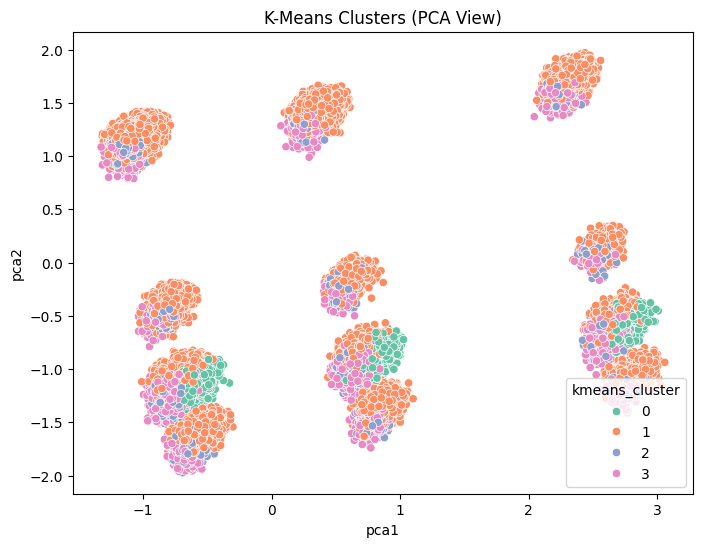

In [14]:
# K-Means Visualization
plt.figure(figsize=(8,6))
sns.scatterplot(x='pca1', y='pca2', hue='kmeans_cluster', data=df_model, palette='Set2')
plt.title("K-Means Clusters (PCA View)")
plt.show() 

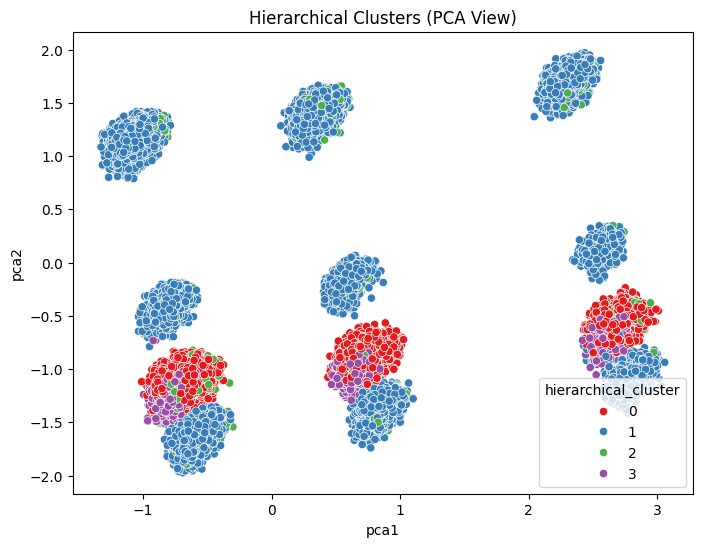

In [15]:
# Hierarchical Visualization
plt.figure(figsize=(8,6)) 
sns.scatterplot(x='pca1', y='pca2', hue='hierarchical_cluster', data=df_model, palette='Set1') 
plt.title("Hierarchical Clusters (PCA View)") 
plt.show() 

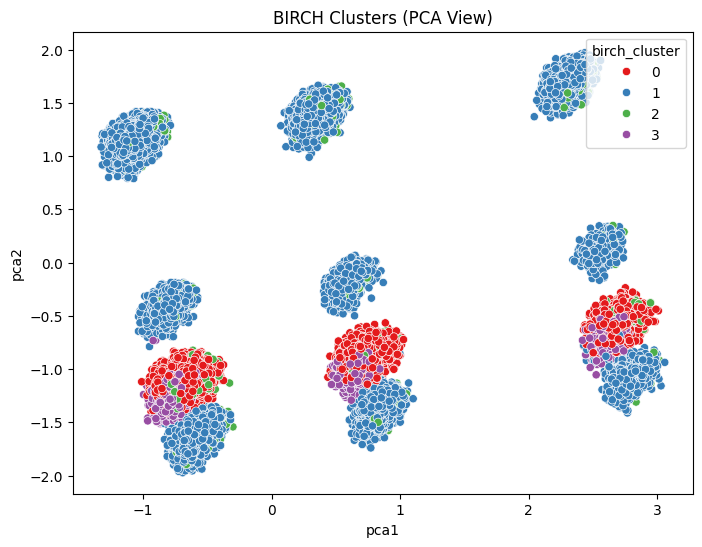

In [16]:
# BIRCH Visualization
plt.figure(figsize=(8,6)) 
sns.scatterplot(x='pca1',y='pca2',hue='birch_cluster',data=df_model,palette='Set1') 
plt.title("BIRCH Clusters (PCA View)") 
plt.show() 

# Insights for PCA Visualization 
1. PCA visualization shows overlapping yet distinguishable cluster regions, reflecting continuous and diverse user behavior patterns.
2. PCA is only for visualization, not clustering.

In [17]:
# Cluster Profiling
cluster_profile = df_model.groupby('kmeans_cluster').agg({
    'sessions_per_week':'mean',
    'avg_session_duration_min':'mean',
    'daily_active_minutes':'mean',
    'engagement_score':'mean',
    'churn_risk_score':'mean',
    'days_since_last_login':'mean'
})

cluster_profile 

,sessions_per_week,avg_session_duration_min,daily_active_minutes,engagement_score,churn_risk_score,days_since_last_login
kmeans_cluster,,,,,,
0,7.971451,12.955323,44.972536,64.743281,0.506291,21.992992
1,8.001144,13.110330,45.098996,64.976186,0.501281,21.997712
2,7.985909,13.373552,45.105520,64.819332,0.496801,22.179402
3,8.015170,13.183382,45.456114,64.994267,0.500244,22.073932


In [ ]:
# Load the raw Dataset
file_path = (r"C:\Users\Vanitha\OneDrive\Documents\GUVI\capstone_project\app_user_behavior_segmentation\data\raw\raw_data.csv")
df = pd.read_csv(file_path) 

In [ ]:
# Map Clusters to Original Data and Create User Segments
# Step 1: Fit K-Means on scaled df_model
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

# Step 2: Map cluster IDs back to original df
df['kmeans_cluster'] = clusters

# Step 3: Map cluster numbers to business-friendly names(Cluster Interpretation)
cluster_labels = {
    0: 'High Engagement Users',
    1: 'Moderate Engagement Users',
    2: 'Low Engagement Users',
    3: 'Occasional Users'
}

df['user_segment'] = df['kmeans_cluster'].map(cluster_labels) 

In [38]:
df[['user_segment']].head()

,user_segment
0,Occasional Users
1,Occasional Users
2,Occasional Users
3,Moderate Engagement Users
4,Moderate Engagement Users


In [35]:
# Identify Users in each segment
# High Engagement Users
high_engagement_users = df[df['user_segment'] == 'High Engagement Users']

# Moderate Engagement Users
moderate_engagement_users = df[df['user_segment'] == 'Moderate Engagement Users']

# Low Engagement Users
low_engagement_users = df[df['user_segment'] == 'Low Engagement Users']

# Occasional Users
occasional_users = df[df['user_segment'] == 'Occasional Users']

# Print first 5 users in each segment for sanity check
print("High Engagement Users:\n", high_engagement_users[['user_id', 'user_segment']].head())
print("Moderate Engagement Users:\n", moderate_engagement_users[['user_id', 'user_segment']].head())
print("Low Engagement Users:\n", low_engagement_users[['user_id', 'user_segment']].head())
print("Occasional Users:\n", occasional_users[['user_id', 'user_segment']].head()) 

High Engagement Users:
     user_id           user_segment
11   100011  High Engagement Users
23   100023  High Engagement Users
35   100035  High Engagement Users
43   100043  High Engagement Users
44   100044  High Engagement Users
Moderate Engagement Users:
    user_id               user_segment
3   100003  Moderate Engagement Users
4   100004  Moderate Engagement Users
5   100005  Moderate Engagement Users
6   100006  Moderate Engagement Users
8   100008  Moderate Engagement Users
Low Engagement Users:
     user_id          user_segment
9    100009  Low Engagement Users
18   100018  Low Engagement Users
19   100019  Low Engagement Users
30   100030  Low Engagement Users
39   100039  Low Engagement Users
Occasional Users:
     user_id      user_segment
0    100000  Occasional Users
1    100001  Occasional Users
2    100002  Occasional Users
7    100007  Occasional Users
12   100012  Occasional Users


In [37]:
# Export Each Segment for Business Use
high_engagement_users.to_csv("business_use_files/high_engagement_users.csv", index=False)
moderate_engagement_users.to_csv("business_use_files/moderate_engagement_users.csv", index=False)
low_engagement_users.to_csv("business_use_files/low_engagement_users.csv", index=False)
occasional_users.to_csv("business_use_files/occasional_users.csv", index=False) 